# Water potability

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data\\raw\water_potability.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\shabe\AppData\Local\Temp\ipykernel_24732\3122990202.py:1: SyntaxWarning: invalid escape sequence '\w'
  df=pd.read_csv("data\\raw\water_potability.csv")


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability'].unique()

array([0, 1])

In [6]:
df.Potability.value_counts(normalize=True)*100

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


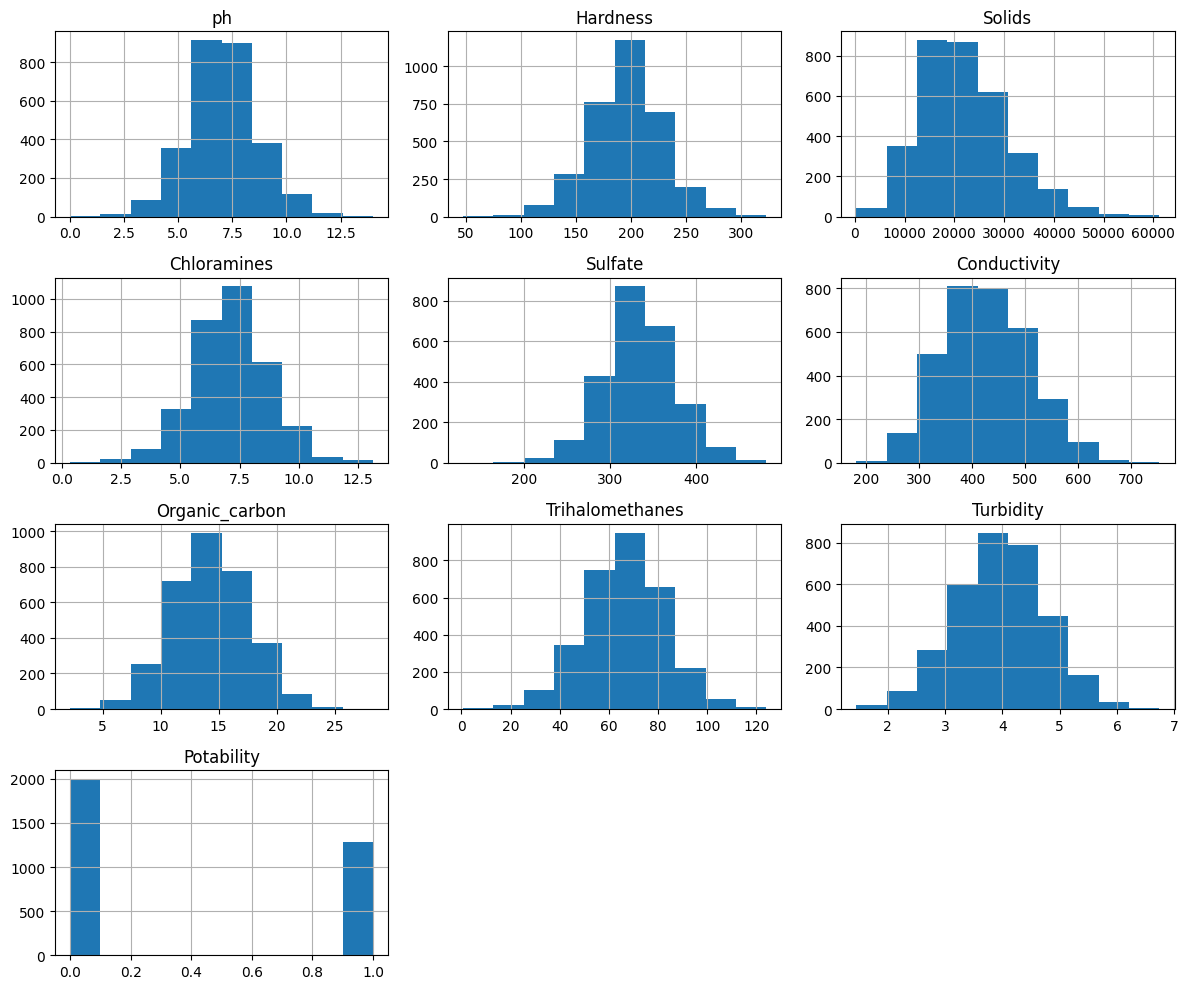

In [8]:
df.hist(figsize=(12,10))
plt.tight_layout()

In [9]:
df.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.085378,196.733292,21777.490788,7.092175,334.56429,426.730454,14.364335,66.303555,3.965800
1,7.073783,195.800744,22383.991018,7.169338,332.56699,425.383800,14.160893,66.539684,3.968328


In [11]:
# t-test for all features
from scipy.stats import ttest_ind

features = df.columns.drop("Potability")

results = []

for col in features:
    x0 = df.loc[df["Potability"] == 0, col].dropna()
    x1 = df.loc[df["Potability"] == 1, col].dropna()
    
    t_stat, p_val = ttest_ind(x0, x1, equal_var=False)
    
    results.append({
        "feature": col,
        "mean_0": x0.mean(),
        "mean_1": x1.mean(),
        "t_stat": t_stat,
        "p_value": p_val
    })

ttest_df = pd.DataFrame(results).sort_values("p_value")
ttest_df


,feature,mean_0,mean_1,t_stat,p_value
2,Solids,21777.490788,22383.991018,-1.905205,0.056864
6,Organic_carbon,14.364335,14.160893,1.725521,0.084545
3,Chloramines,7.092175,7.169338,-1.323927,0.185650
4,Sulfate,334.564290,332.566990,1.115925,0.264610
1,Hardness,196.733292,195.800744,0.768762,0.442109
5,Conductivity,426.730454,425.383800,0.462591,0.643695
7,Trihalomethanes,66.303555,66.539684,-0.396477,0.691786
0,ph,7.085378,7.073783,0.193589,0.846513
8,Turbidity,3.965800,3.968328,-0.090431,0.927952


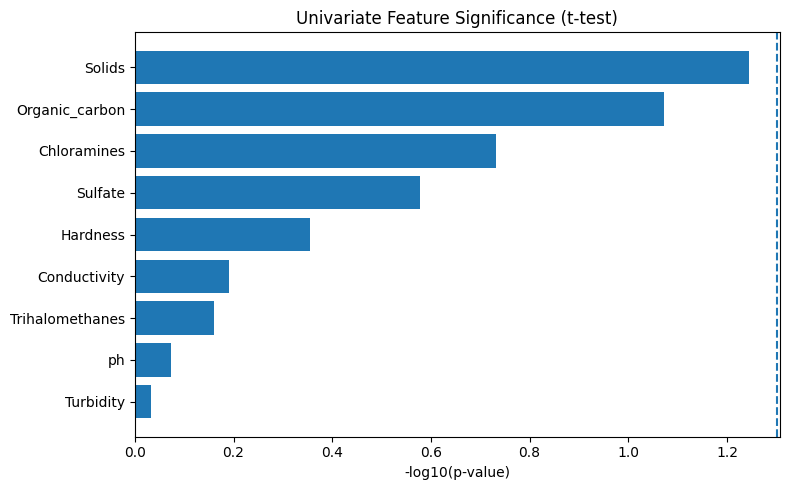

In [15]:
import matplotlib.pyplot as plt
import numpy as np

ttest_df["neg_log_p"] = -np.log10(ttest_df["p_value"])

ttest_df = ttest_df.sort_values("neg_log_p", ascending=True)

plt.figure(figsize=(8, 5))
plt.barh(ttest_df["feature"], ttest_df["neg_log_p"])
plt.axvline(-np.log10(0.05), linestyle="--")
plt.xlabel("-log10(p-value)")
plt.title("Univariate Feature Significance (t-test)")
plt.tight_layout()
plt.show()


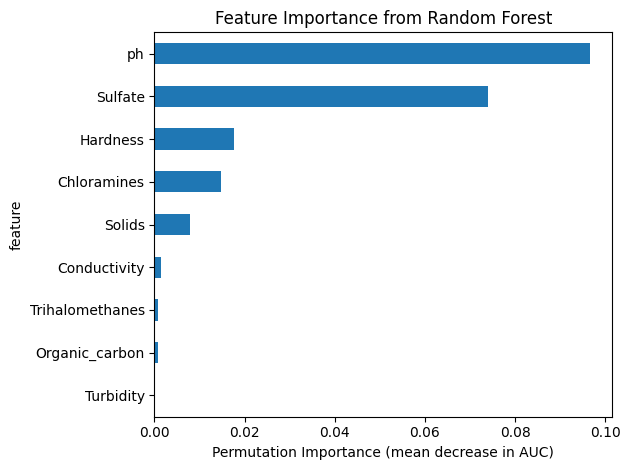

In [18]:
# feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
X = df.drop("Potability", axis=1)
y = df["Potability"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
perm_importance = permutation_importance(rf, X, y, n_repeats=20, scoring='roc_auc', random_state=42)
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": perm_importance.importances_mean}).sort_values("importance", ascending=True)
feature_importance_df.plot.barh(x="feature", y="importance", legend=False)
plt.xlabel("Permutation Importance (mean decrease in AUC)")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [20]:

from sklearn.model_selection import cross_val_score


X_reduced = X.drop(columns=[
    "Conductivity",
    "Trihalomethanes",
    "Organic_carbon",
    "Turbidity"
])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
score_full = cross_val_score(rf, X, y, scoring="roc_auc", cv=5).mean()
score_reduced = cross_val_score(rf, X_reduced, y, scoring="roc_auc", cv=5).mean()


In [21]:
print(f"Full model AUC: {score_full:.4f}")
print(f"Reduced model AUC: {score_reduced:.4f}")

Full model AUC: 0.6144
Reduced model AUC: 0.6121


In [ ]:
# But as data set is already small, removing features doesn't significantly reduce performance, so we can keep all features for modeling.